# LeNet

* It is a CNN architecture.
* It is made up of 7 layers.
* 3 convolutional layers - Conv2D()
* 2 subsampling layers - AveragePooling2D()
* 2 fully connected layers - Dense()

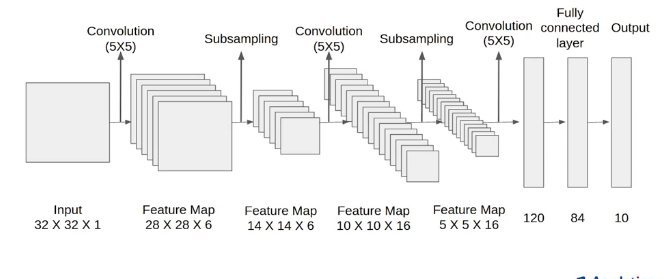

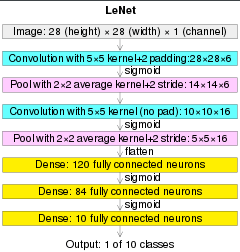

### Import the required packages:

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

### Getting the dataset:

In [4]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

### Adding some padding to the images: 

In [5]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

### Expanding the dimensions of the image:

In [6]:
x_train = tf.expand_dims(x_train, axis=3, name=None) # we add the new dimension in a new axis
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

### Splitting the data for the validation set:

In [8]:
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

### Creating the model:

In [10]:
model = models.Sequential([
    layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]),
    layers.AveragePooling2D(2),
    layers.Activation('sigmoid'),
    layers.Conv2D(16, 5, activation='tanh'),
    layers.AveragePooling2D(2),
    layers.Activation('sigmoid'),
    layers.Conv2D(120, 5, activation='tanh'),
    layers.Flatten(),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 activation (Activation)     (None, 14, 14, 6)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_1 (Activation)   (None, 5, 5, 16)         

In [11]:
model.compile(optimizer='adam', 
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

### Training the model:

In [12]:
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=40,
                    validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 17s 18ms/step - loss: 1.1720 - accuracy: 0.5804 - val_loss: 0.3029 - val_accuracy: 0.9095
Epoch 2/40
907/907 [==============================] - 16s 18ms/step - loss: 0.3254 - accuracy: 0.8967 - val_loss: 0.2081 - val_accuracy: 0.9440
Epoch 3/40
907/907 [==============================] - 17s 19ms/step - loss: 0.2459 - accuracy: 0.9214 - val_loss: 0.1335 - val_accuracy: 0.9660
Epoch 4/40
907/907 [==============================] - 18s 20ms/step - loss: 0.2069 - accuracy: 0.9339 - val_loss: 0.1274 - val_accuracy: 0.9640
Epoch 5/40
907/907 [==============================] - 18s 20ms/step - loss: 0.1803 - accuracy: 0.9428 - val_loss: 0.1185 - val_accuracy: 0.9675
Epoch 6/40
907/907 [==============================] - 17s 19ms/step - loss: 0.1567 - accuracy: 0.9494 - val_loss: 0.0911 - val_accuracy: 0.9765
Epoch 7/40
907/907 [==============================] - 17s 19ms/step - loss: 0.1396 - accuracy: 0.9559 - val_loss: 0.0815 - val_accuracy:

### Plotting accuracy and losses:

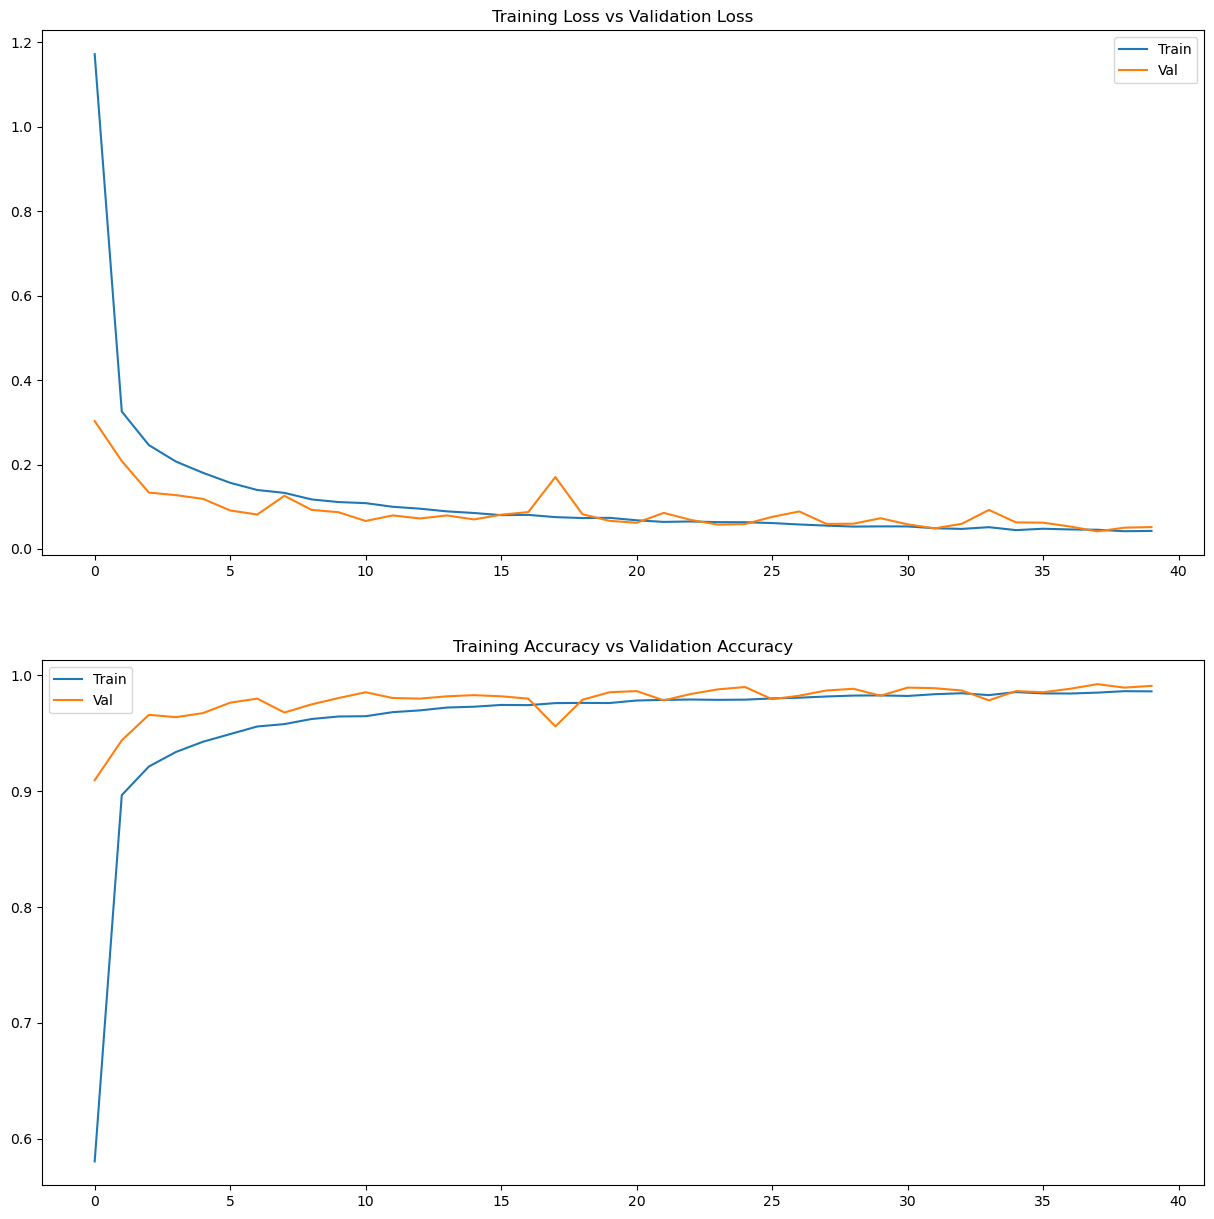

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

### Printing the metrics:

In [15]:
results = model.evaluate(x_test, y_test)
print("Loss = {}, Accuray = {}".format(results[0], results[1]))

313/313 [==============================] - 3s 10ms/step - loss: 0.0646 - accuracy: 0.9792
Loss = 0.06462090462446213, Accuray = 0.979200005531311
